In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
# Load csv file 
crypto_df= pd.read_csv('crypto_data.csv')
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
# Data prep and EDA
crypto_df.shape

(1252, 7)

In [4]:
crypto_df.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [5]:
crypto_df= crypto_df.drop(columns=['IsTrading'])
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [6]:
# Checking for null values and removing null values 
for column in crypto_df.columns: 
    print(f"Column{column} has {crypto_df[column].isnull().sum()} null values")

ColumnUnnamed: 0 has 0 null values
ColumnCoinName has 0 null values
ColumnAlgorithm has 0 null values
ColumnProofType has 0 null values
ColumnTotalCoinsMined has 508 null values
ColumnTotalCoinSupply has 0 null values


In [7]:
crypto_df=crypto_df.dropna()

In [8]:
for column in crypto_df.columns: 
    print(f"Column {column} has {crypto_df[column].isnull().sum()} null values")

Column Unnamed: 0 has 0 null values
Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 0 null values
Column TotalCoinSupply has 0 null values


In [9]:
# drop CoinName column since it doesn't contribute towards the data 
crypto_df.drop(['Unnamed: 0', 'CoinName'], axis=1, inplace= True)
crypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
4,SHA-256,PoW/PoS,0.000000e+00,0
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000
1247,Scrypt,PoS,1.283270e+05,1000000


In [10]:
# Filter for cryptocurrencies that have been mined
crypto_df = crypto_df[crypto_df["TotalCoinsMined"]> 0]
crypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000
1247,Scrypt,PoS,1.283270e+05,1000000


In [11]:
# convert Algorithm and ProofType into numerical data 
X = pd.get_dummies(crypto_df, columns=['Algorithm', 'ProofType'], drop_first=True, dtype=float)
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.055185e+09,532000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.927942e+10,314159265359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.792718e+07,21000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.076842e+08,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,1.493105e+07,250000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1245,9.802226e+08,1400222610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1246,7.296538e+06,21000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1247,1.283270e+05,1000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
X.columns

Index(['TotalCoinsMined', 'TotalCoinSupply', 'Algorithm_536',
       'Algorithm_Argon2d', 'Algorithm_BLAKE256', 'Algorithm_Blake',
       'Algorithm_Blake2S', 'Algorithm_Blake2b', 'Algorithm_C11',
       'Algorithm_Cloverhash', 'Algorithm_Counterparty',
       'Algorithm_CryptoNight', 'Algorithm_CryptoNight Heavy',
       'Algorithm_CryptoNight-V7', 'Algorithm_Cryptonight-GPU',
       'Algorithm_DPoS', 'Algorithm_Dagger', 'Algorithm_Dagger-Hashimoto',
       'Algorithm_ECC 256K1', 'Algorithm_Equihash',
       'Algorithm_Equihash+Scrypt', 'Algorithm_Ethash', 'Algorithm_Exosis',
       'Algorithm_Green Protocol', 'Algorithm_Groestl', 'Algorithm_HMQ1725',
       'Algorithm_HybridScryptHash256', 'Algorithm_IMesh',
       'Algorithm_Jump Consistent Hash', 'Algorithm_Keccak',
       'Algorithm_Leased POS', 'Algorithm_Lyra2RE', 'Algorithm_Lyra2REv2',
       'Algorithm_Lyra2Z', 'Algorithm_M7 POW', 'Algorithm_Multiple',
       'Algorithm_NIST5', 'Algorithm_NeoScrypt', 'Algorithm_Ouroboros',
   

In [13]:
# standardize the dataset
scaler= StandardScaler()
crypto_scaled_df = scaler.fit_transform(X)

In [14]:
# Check for num of features
len(X.columns)

99

In [15]:
# dimensionality and reduction using PCA to retain 90% of features
pca = PCA(n_components=0.90)
crypto_pca =pca.fit_transform(crypto_scaled_df)
crypto_pca

array([[-3.26612444e-01,  1.15097138e+00, -5.07996526e-01, ...,
         3.02218295e-15, -1.37802295e-15,  7.02158761e-16],
       [-3.09271333e-01,  1.15120169e+00, -5.08394794e-01, ...,
         2.83865454e-15, -1.42350621e-15,  7.73001073e-16],
       [ 2.41980333e+00,  1.73076171e+00, -5.80011552e-01, ...,
        -6.54818586e-14,  7.30635421e-14,  3.50133976e-14],
       ...,
       [-1.50844365e-01, -2.08632113e+00,  3.49503546e-01, ...,
        -1.01891974e-15,  1.08776873e-15,  1.65228326e-15],
       [-2.80562025e-01,  7.96545183e-01, -2.33275582e-01, ...,
         1.93400234e-15,  8.59587229e-16,  2.64750501e-16],
       [-3.25603053e-01,  1.15093504e+00, -5.08012661e-01, ...,
         2.83646620e-15, -1.53034208e-15,  7.41576471e-16]])

In [16]:
# transform PCA data to a dataframe 
crypto_pca_df = pd.DataFrame(data = crypto_pca)
crypto_pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,-0.326612,1.150971,-0.507997,0.001282,2.893271e-14,1.110034e-11,-0.019931,-1.236770,-0.062490,-0.385601,...,-4.987899e-15,2.255947e-15,4.850638e-15,-5.769773e-15,4.093775e-15,2.073905e-15,-1.125666e-15,3.022183e-15,-1.378023e-15,7.021588e-16
1,-0.309271,1.151202,-0.508395,0.001271,2.873204e-14,1.100724e-11,-0.020579,-1.240166,-0.066257,-0.381118,...,-4.836142e-15,2.365007e-15,4.800610e-15,-5.700236e-15,4.325382e-15,1.939060e-15,-9.832087e-16,2.838655e-15,-1.423506e-15,7.730011e-16
2,2.419803,1.730762,-0.580012,0.004412,4.682597e-14,3.814889e-11,-0.071874,-1.582991,-0.733041,0.543650,...,6.162442e-14,-5.581712e-14,-4.143401e-14,-5.505556e-14,-1.159837e-14,-4.999681e-14,6.612934e-14,-6.548186e-14,7.306354e-14,3.501340e-14
3,-0.139143,-1.352119,0.153305,-0.001143,-1.033444e-14,-9.877742e-12,0.004053,0.181693,0.227494,-0.171103,...,4.096820e-15,1.180454e-15,-4.524331e-15,3.034862e-15,8.299035e-16,1.699554e-16,-2.191241e-16,-4.313327e-15,-3.067792e-15,1.478388e-14
4,-0.136050,-2.118689,0.328052,-0.001617,-2.521974e-14,-1.398768e-11,0.037846,0.361939,0.195270,0.004130,...,-3.585357e-14,6.131279e-14,-6.844180e-14,5.370321e-14,-2.619374e-14,-1.093539e-14,-5.916921e-14,6.646172e-15,-8.902030e-14,3.983992e-14


In [17]:
# fetch the explained variance 
pca.explained_variance_ratio_

array([0.02762775, 0.02105998, 0.02029202, 0.02023711, 0.02023709,
       0.02023709, 0.02021593, 0.01830351, 0.01734282, 0.01719158,
       0.01610793, 0.01533877, 0.01456949, 0.01427253, 0.01397851,
       0.01226043, 0.01192534, 0.01090578, 0.01059435, 0.0103803 ,
       0.01031726, 0.01030787, 0.01026939, 0.01024942, 0.01023687,
       0.01020664, 0.01018934, 0.01018847, 0.01018256, 0.01017899,
       0.0101726 , 0.01017152, 0.01017152, 0.01017002, 0.01016072,
       0.0101543 , 0.01015154, 0.01015021, 0.01014587, 0.0101432 ,
       0.01013958, 0.01013638, 0.01013614, 0.01013614, 0.01013614,
       0.01013529, 0.0101305 , 0.0101294 , 0.0101257 , 0.01011964,
       0.01011855, 0.01011855, 0.01011855, 0.01011855, 0.01011855,
       0.01011855, 0.01011855, 0.01011855, 0.01011855, 0.01011855,
       0.01011855, 0.01011855, 0.01011855, 0.01011855, 0.01011855,
       0.01011855, 0.01011855, 0.01011855, 0.01011855, 0.01011855,
       0.01011855, 0.01011855, 0.01011855, 0.01011855, 0.01011

In [18]:
# further reduce the dataset with t_SNE
tsne = TSNE(learning_rate=35)
tsne_features= tsne.fit_transform(crypto_pca_df)

In [19]:
# check the dataset has 2 columns 
tsne_features.shape

(577, 2)

In [20]:
# the first column of transformed features
crypto_pca_df['x']=tsne_features[:,0]

# the second column of transformed features
crypto_pca_df['y']= tsne_features[:,1]

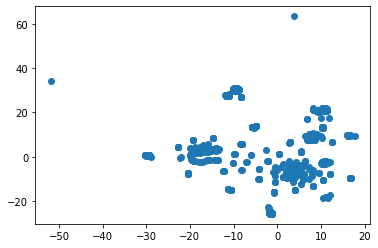

In [21]:
# visulize the clusters
plt.scatter(crypto_pca_df['x'], crypto_pca_df['y'])
plt.show()

In [22]:
# cluster analysis w/k-means
inertia =[]
k=list(range(1,11))

# calculate the inertia for the range of k values 
for i in k: 
    km = KMeans(n_clusters = i, random_state=0)
    km.fit(crypto_pca_df)
    inertia.append(km.inertia_)
    
# Create the Elbow Curve using hvPlot
elbow_data={"k": k, "inertia": inertia}
df_elbow =pd.DataFrame(elbow_data)
df_elbow.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,242163.055146
1,2,165269.050098
2,3,110340.511742
3,4,88078.379314
4,5,78183.404108


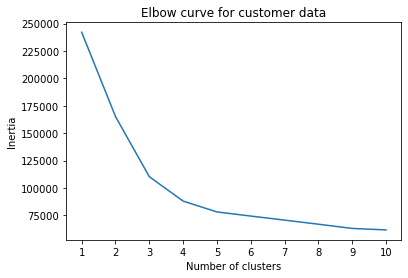

In [23]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

Summary: The elbow curve shows the number of groups we should select is 4 where the inertia trajectory begins to change. 

The T-SNE feature plot and the K-Means elbow plot suggests a meaningful cluster in this dataset. An optimal point for K-Mean selection using the elbow plot would be 4. 